In [22]:
# Importing necessary modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm


In [23]:
# Reading the dataset.
dataset = pd.read_csv('Source/Sales.csv',encoding='latin-1')
dataset['Order_Date'] = pd.to_datetime(dataset['Order_Date'], format="%d/%m/%Y")
dataset['Ship_Date'] = pd.to_datetime(dataset['Ship_Date'], format="%d/%m/%Y")
dataset.head()



,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [24]:
dataset.dtypes

Row_ID                    int64
Order_ID                 object
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
Ship_Mode                object
Customer_ID              object
Customer_Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal_Code             float64
Region                   object
Product_ID               object
Category                 object
Sub_Category             object
Product_Name             object
Sales                   float64
dtype: object

In [25]:
set(dataset['Category'])

{'Furniture', 'Office Supplies', 'Technology'}

## Data Preprocessing

We shall first analyse the time series of Furniture Sales followed by other categories.

In [26]:
#dataset = dataset.loc[dataset['Category'] == 'dataset']

dataset = dataset

# This shows that we have time-series data of 4 years for dataset sales.
print(dataset['Order_Date'].min())
dataset['Order_Date'].max()

2015-01-03 00:00:00


Timestamp('2018-12-30 00:00:00')

In [27]:
cols = ['Row_ID', 'Order_ID', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City',
        'State', 'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category', 'Product_Name']

dataset.drop(cols, axis=1, inplace=True)

In [28]:
# dataset data
print(dataset)
dataset.sort_values('Order_Date')
dataset.isna().sum()

     Order_Date     Sales
0    2017-11-08  261.9600
1    2017-11-08  731.9400
2    2017-06-12   14.6200
3    2016-10-11  957.5775
4    2016-10-11   22.3680
...         ...       ...
9795 2017-05-21    3.7980
9796 2016-01-12   10.3680
9797 2016-01-12  235.1880
9798 2016-01-12   26.3760
9799 2016-01-12   10.3840

[9800 rows x 2 columns]


Order_Date    0
Sales         0
dtype: int64

In [29]:
dataset = dataset.groupby('Order_Date')['Sales'].sum().reset_index()

## Indexing time-series data 

In [30]:
dataset = dataset.set_index('Order_Date')
#dataset = dataset.apply(lambda x: x.set_index('Order Date'))
dataset.index

DatetimeIndex(['2015-01-03', '2015-01-04', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-09', '2015-01-10', '2015-01-11',
               '2015-01-13', '2015-01-14',
               ...
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order_Date', length=1230, freq=None)

In [31]:
# Averaging Daily Sales
y = dataset['Sales'].resample('MS').mean()

In [32]:
y['2017':]

Order_Date
2017-01-01     882.975762
2017-02-01     999.078913
2017-03-01    1827.323536
2017-04-01    1487.683346
2017-05-01    1953.686483
2017-06-01    1527.864846
2017-07-01    1532.831320
2017-08-01    1090.792868
2017-09-01    2471.192532
2017-10-01    2206.779000
2017-11-01    2726.430890
2017-12-01    3419.254321
2018-01-01    1890.281478
2018-02-01     996.049870
2018-03-01    2102.264743
2018-04-01    1316.367041
2018-05-01    1623.184526
2018-06-01    1853.489527
2018-07-01    1545.693241
2018-08-01    2327.327704
2018-09-01    3076.888857
2018-10-01    2766.004686
2018-11-01    3931.271833
2018-12-01    2863.116855
Freq: MS, Name: Sales, dtype: float64

## Data time-series visualization

<Axes: xlabel='Order_Date'>

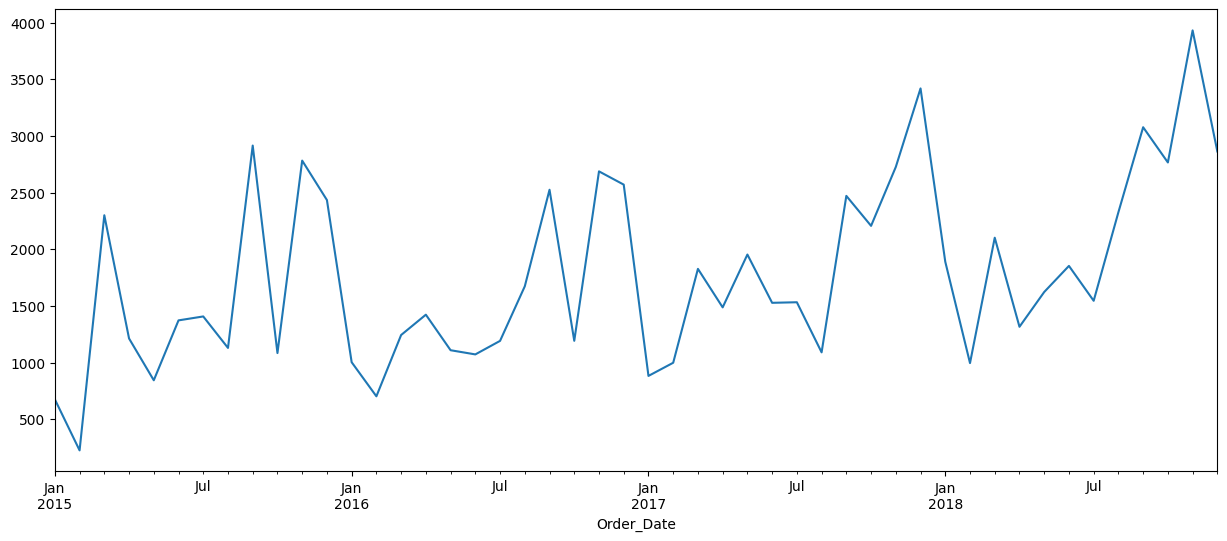

In [33]:
y.plot(figsize=(15, 6))

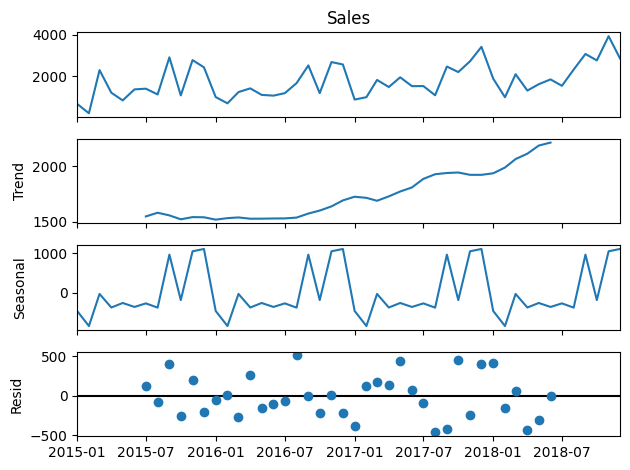

In [34]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

The above plot shows that the sales of dataset is highly unstable with seasonality and trend easily observable.

## Time Series forecasting with ARIMA Model

ARIMA models are donated with the notation: ARIMA (p, d, q) where:
* p denotes seasonality
* d denotes trend
* q denotes noise in data

Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal components of the series.

Trend Components:
* p denotes Trend autoregression order
* d denotes Trend difference order
* q denotes Trend moving average order

Seasonality Components:
* p denotes Seasonal autoregressive order.
* d denotes Seasonal difference order.
* q denotes Seasonal moving average order.
* m denotes the number of time steps for a single seasonal period.

In [35]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Few parameter combinations are:')
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


Now that we've generated all possible parameters for our SARIMA model, we shall find out the best parameter to train the model on it finally. :)

SARIMA stands for **Seasonal AutoRegressive Integrated Moving Average** model which is an extension of ARIMA model used in modeling the seasonality component as well. So, we need not to make time-series stationary (non-seasonal) first before forecasting. 

In [36]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:848.2988147245367
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1446.0299723620528
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:544.2340387863895
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:364.56293195863725
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:558.7816307832966


c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1404.3731485731562
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:379.04731551524776
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:365.83284268876173
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:799.6209949695337
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2809.9069918931973
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:530.5600846818908


c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:349.00434701795325
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:560.7490122822518


c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1369.0457273741151
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:378.43901384281025
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:350.46497935844826
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:760.5175477957108


c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1474.3118366976612
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:547.7241294179208
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:349.6852676581366
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:550.6187546269114
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1476.782709749063
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:368.2251344433067
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:351.2703098264127
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:726.5532781684758
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:2146.221896346598
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:507.49333577478507


c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:325.312816454075
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:541.7433090872706
ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:2149.501376695292


c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:356.28778230679757
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:325.49841875545724
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:776.5004825293407
ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1543.3465217580354
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:545.519198516788
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:362.136332621039
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:546.0193440651606


c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1382.6938007315061
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:362.46251259842603
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:362.66570441485027
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:744.8872620951788


c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:1117.6172748799108
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:531.7325706818699
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:342.1876499784471
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:538.7562419364679


c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:1291.8106289303623
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:357.5709974131877
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:342.411376299102
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:752.5306569834754
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1323.177186274353
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:538.7966881799632
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:346.852950542235


c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:530.6770899021589
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1519.1025611192342
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:347.88963462869236


c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:348.041865904447
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:727.3470022579648
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:2354.8103861988648
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:509.41029063510547


c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:327.31144626764075
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:526.7681875002513
ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:2569.4003041579385
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:343.54005243314936
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:327.49839515139763


c:\Users\49177\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


We got the lowest AIC value: 282.8227947577222 for ARIMA(1, 1, 1)x(1, 1, 1, 12). We shall use these best params in our model.

Here, the **Akaike information criterion (AIC)** is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

AIC estimates the relative amount of information lost by a given model: the less information a model loses (less AIC value), the higher the quality of that model.

In [37]:
# Training the ARIMA model.
model = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False,
                                            enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0299      0.227     -0.132      0.895      -0.475       0.415
ma.L1         -1.0000      0.487     -2.055      0.040      -1.954      -0.046
ar.S.L12      -0.4492      0.227     -1.979      0.048      -0.894      -0.004
sigma2      2.254e+05   2.16e-06   1.04e+11      0.000    2.25e+05    2.25e+05


In [38]:
results.plot_diagnostics(figsize=(15, 8))
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1500x800 with 0 Axes>

The above plots suggest that the Model Residuals are nearly Normally Distributed.

## Validating the model forecasts

To validate the model results, we compare the actual sales with the predicted sales of the time series data starting
from 2017/01/01 till the end of the data.

            lower Sales  upper Sales
Order_Date                          
2017-01-01   279.151486  2873.477978
2017-02-01  -247.267642  2031.784265
2017-03-01  1068.425390  3217.369399
2017-04-01   646.240076  2727.036551
2017-05-01   287.599207  2326.399347
2017-06-01   602.540460  2612.849467
2017-07-01   701.965114  2691.670463
2017-08-01   832.100884  2806.210675
2017-09-01  2045.781055  4007.674244
2017-10-01   435.647081  2387.711300
2017-11-01  2059.232637  4003.217580
2017-12-01  1848.423376  3785.649557
2018-01-01   298.061743  2229.550288
2018-02-01   272.870442  2199.427261
2018-03-01   982.778471  2905.050777
2018-04-01   875.805294  2794.320715
2018-05-01   983.180438  2898.374772
2018-06-01   710.161238  2622.398600
2018-07-01   763.254835  2672.842560
2018-08-01   739.523046  2646.722916
2018-09-01  1889.565293  3794.602115
2018-10-01  1168.808842  3071.877102
2018-11-01  2142.416489  4043.685564
2018-12-01  2501.034013  4400.652324


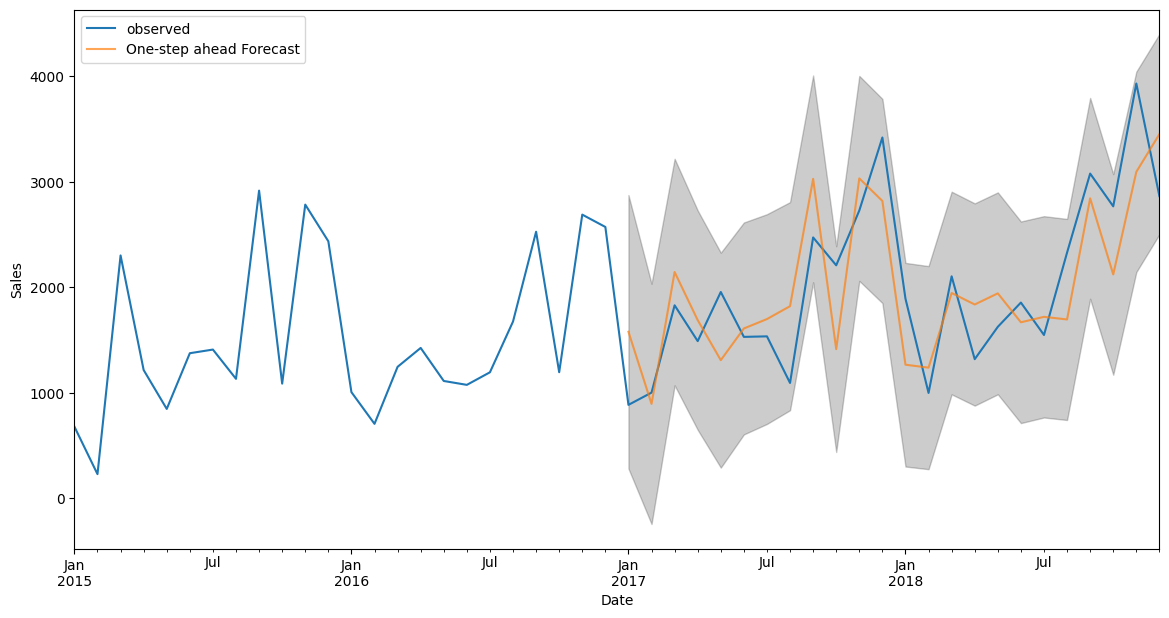

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

The above plot demonstrates that the predicted values alligns well with the true values capturing an upward seasonality. Now, we calculate the Mean Square Error of our predicted values wrt the orignal values.

In [ ]:
y_predicted = pred.predicted_mean
y_true = y['2017-01-01':]

r2 = r2_score(y_true, y_predicted)
print('R^2 is:', round(r2, 4))

mse = mean_squared_error(y_true, y_predicted)
print('mean_squared_error is:', round(mse, 4))

mae = mean_absolute_error(y_true, y_predicted)
print('mean_absolute_error is:', round(mae, 4))




NameError: name 'pred' is not defined

## Future Forecasts

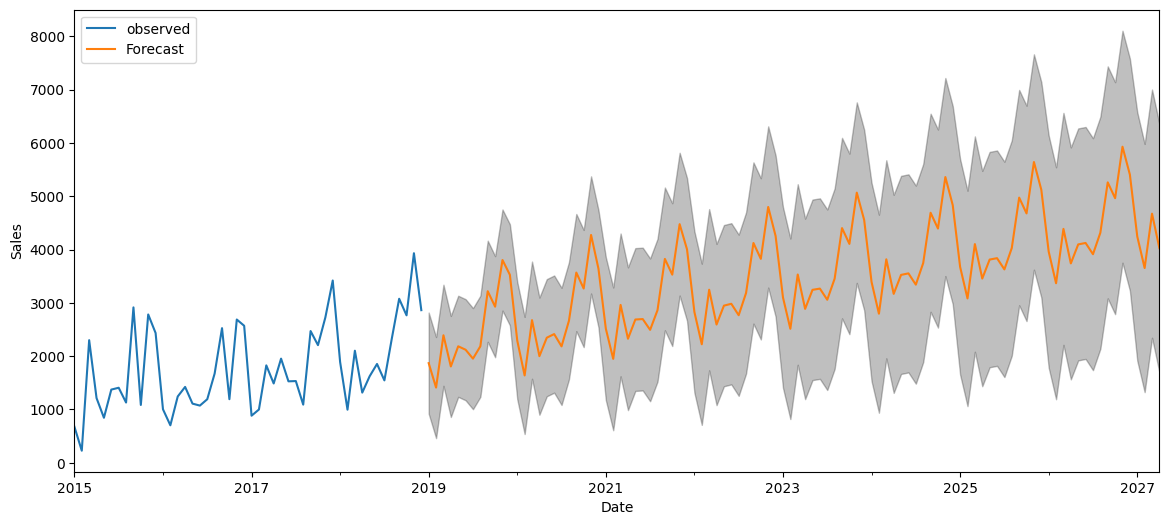

In [ ]:
# Forecasting the future (out of sample) values.
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()